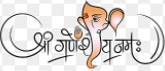

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("E:\Machine Learning Projects\K-Means\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


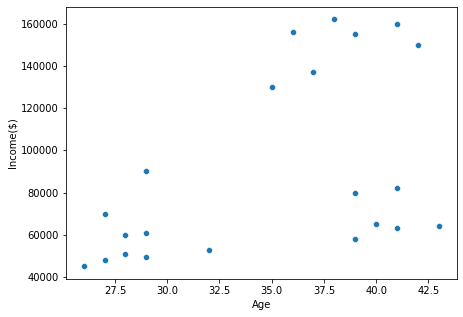

In [3]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Income($)")
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    print(f'k:{k}, SSE :{km.inertia_}')

k:1, SSE :39748148458.545456
k:2, SSE :3318233941.1619053
k:3, SSE :1577046058.883117
k:4, SSE :814746044.2545456
k:5, SSE :296500418.0952381
k:6, SSE :231967084.46190476
k:7, SSE :173633694.45
k:8, SSE :119633613.78333335
k:9, SSE :92633459.7


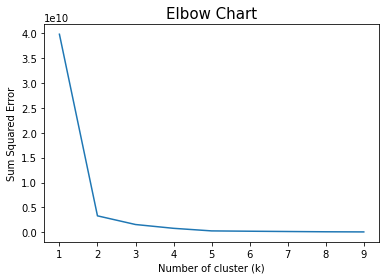

In [6]:
#plt.figure(figsize=(7,5))

sns.lineplot(x=k_rng, y=sse)
plt.xlabel('Number of cluster (k)', fontsize=10)
plt.ylabel('Sum Squared Error', fontsize=10)
plt.title('Elbow Chart', fontsize=15)
plt.show()

In [7]:
kmeans= KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [8]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [9]:
kmeans.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [10]:
df.groupby('cluster').describe()

Age                                                    Income($)  \
        count       mean       std   min   25%   50%   75%   max     count   
cluster                                                                      
0         4.0  34.000000  7.023769  27.0  28.5  34.0  39.5  41.0       4.0   
1         7.0  38.285714  2.563480  35.0  36.5  38.0  40.0  42.0       7.0   
2        11.0  32.909091  6.456850  26.0  28.0  29.0  39.5  43.0      11.0   

                                                                              \
                  mean           std       min       25%       50%       75%   
cluster                                                                        
0         80500.000000   8225.975120   70000.0   77500.0   81000.0   84000.0   
1        150000.000000  12069.244660  130000.0  143500.0  155000.0  158000.0   
2         56136.363636   7071.389217   45000.0   50250.0   58000.0   62000.0   

                   
              max  
cluster            
0         90000.0  
1        162000.0  
2         65000.0

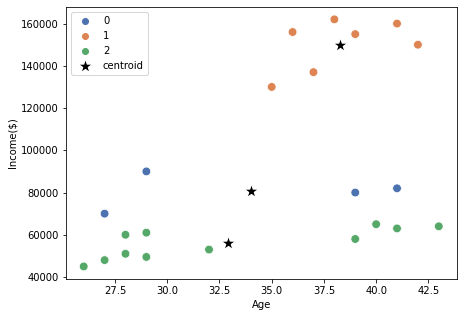

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Income($)", hue='cluster', palette='deep', s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
                s=250, color='black',marker='*',label='centroid')

plt.show()

### Preprocessing using min max scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


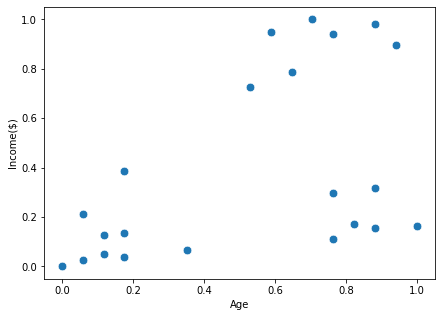

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Income($)", s=75)
plt.show()

In [15]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(df[['Age','Income($)']])

KMeans(n_clusters=3)

In [16]:
df['cluster']=kmeans.predict(df[['Age','Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [17]:
df.groupby('cluster').describe()

Age                                                              \
        count      mean       std       min       25%       50%       75%   
cluster                                                                     
0         9.0  0.137255  0.101885  0.000000  0.058824  0.117647  0.176471   
1         7.0  0.722689  0.150793  0.529412  0.617647  0.705882  0.823529   
2         6.0  0.852941  0.089210  0.764706  0.779412  0.852941  0.882353   

                  Income($)                                                    \
              max     count      mean       std       min       25%       50%   
cluster                                                                         
0        0.352941       9.0  0.116334  0.120604  0.000000  0.038462  0.068376   
1        0.941176       7.0  0.897436  0.103156  0.726496  0.841880  0.940171   
2        1.000000       6.0  0.202279  0.084381  0.111111  0.155983  0.166667   

                             
              75%       max  
cluster                      
0        0.136752  0.384615  
1        0.965812  1.000000  
2        0.267094  0.316239

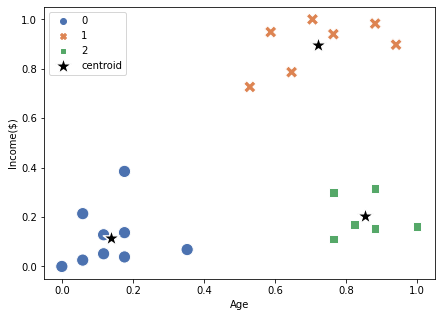

In [18]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data= df, x = 'Age', y ='Income($)', 
                      hue='cluster',style='cluster',  s=150, palette='deep')

ax = sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],color='black',
                      marker="*", s=300, label='centroid', ax=ax)

plt.show()